In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img_path = 'data_face/happy/0.jpg'

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

plt.imshow(img)
plt.show()

In [3]:
faces

array([[256, 223, 511, 511]], dtype=int32)

In [8]:
from PIL import Image

def cropImage(boundaries, img_path, output_img_path):
    im = Image.open(img_path)
    im_width = im.size[0]
    im_height = im.size[1]
    left = boundaries[0]
    top = boundaries[1]
    right = left + boundaries[2]
    bottom = top + boundaries[3]
    
    diff_width = right - left
    diff_height = bottom - top
    diff = abs(diff_width - diff_height)
    if diff_width > diff_height:
        bottom += diff
        bottom = min(bottom, im_height)
    else:
        right += diff
        right = min(right, im_width)
    
    if max(diff_width, diff_height) < 200:
#         print('the image is too small')
        return None
    
    im1 = im.crop((left, top, right, bottom))
    
    newsize = (224, 224) 
    im2 = im1.resize(newsize)
    return im2

In [10]:
image_new = cropImage(faces[0], img_path, 'cropped_image.jpg')

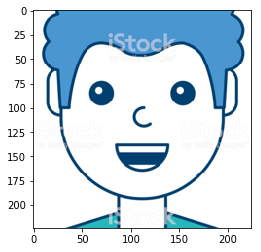

In [11]:
plt.imshow(image_new)
plt.show()

In [7]:
def isImageValid(filename):
    try:
        im = Image.open(filename)
        return True
    except IOError:
#         print("the file is not an image")
        return False
    
    
FACE_CASCADE = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def getFaceBoundary(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = FACE_CASCADE.detectMultiScale(gray, 1.3, 5)
    
    faces = list(faces[0])
    if len(faces) == 0:
#         print('no face detected')
        return None
    return faces


def processOneImage(img_path, output_img_path):
    if not isImageValid(img_path):
        return
    
    boundaries = getFaceBoundary(img_path)
    if boundaries is None:
        return
    
    im = cropImage(boundaries, img_path, output_img_path)
    im.save(output_img_path, 'JPEG')

In [14]:
img_path = 'data_face/happy/0.jpg'
output_img_path = 'test_output.jpg'
processOneImage(img_path, output_img_path)

In [4]:
def processOneDirectory(raw_dir, out_dir):
    raw_image_files = os.listdir(raw_dir)
    for i in range(0, len(raw_image_files)):
        input_image_path = os.path.join(raw_dir, raw_image_files[i])
        out_image_path = os.path.join(out_dir, raw_image_files[i])
        try:
            processOneImage(input_image_path, out_image_path)
        except:
#             print('something wrong happens')
            pass
        
        if i % 200 == 0:
            print(i, raw_dir)

In [5]:
import os

FACE_RAW_DATASET_PATH = 'data_face/'
dirs = os.listdir(FACE_RAW_DATASET_PATH)
ds = []
for d in dirs:
    if d.isalnum():
        ds.append(os.path.join(FACE_RAW_DATASET_PATH, d))

        
FACE_EXTRACTED_DATASET_PATH = 'data_face_extracted/'
ds_face = []
for d in ds:
    f = os.path.basename(d)
    f_path = os.path.join(FACE_EXTRACTED_DATASET_PATH, f)
    ds_face.append(f_path)

In [6]:
print(ds)
print(ds_face)

['data_face/happy', 'data_face/unhappy']
['data_face_extracted/happy', 'data_face_extracted/unhappy']


In [9]:
for i in range(0, len(ds)):
    raw_dir = ds[i]
    out_dir = ds_face[i]
    try:
        os.makedirs(out_dir)
    except:
        pass
    processOneDirectory(raw_dir, out_dir)

0 data_face/happy
200 data_face/happy
400 data_face/happy
600 data_face/happy
800 data_face/happy
1000 data_face/happy
1200 data_face/happy
1400 data_face/happy
1600 data_face/happy
0 data_face/unhappy
200 data_face/unhappy
400 data_face/unhappy
600 data_face/unhappy
800 data_face/unhappy
1000 data_face/unhappy
1200 data_face/unhappy
1400 data_face/unhappy
